In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ase.io import read
from ase.neighborlist import NeighborList, natural_cutoffs
from collections import Counter
from scipy.ndimage import gaussian_filter1d

import seaborn as sns
import ast

In [ ]:
# MQ Run CONTCAR 1.5gm/cm3 Run: /scratch/09900/joshinkumar/Relaxed_Carbon_DFT_Runs/Bishal_Comparison_Run_1.5_gmcm3/5_Relaxing/

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. Add the font file
font_path = "/home1/09900/joshinkumar/Backups/Jupyter_Notebooks/arial/ARIAL.TTF"  # Replace with the actual path to your .ttf file
fm.fontManager.addfont(font_path)

# # 2. Rebuild the font cache
# fm._rebuild()

# 3. Now set your global font to Arial
plt.rcParams.update({"font.family": "Arial"})

# Then proceed with your plots
plt.plot([1,2,3],[4,5,6])
plt.title("Testing Arial Font")
plt.show()

plt.rcParams.update({'font.size': 14})  # Adjust the font size as desired

FileNotFoundError: [Errno 2] No such file or directory: '/home1/09900/joshinkumar/Backups/Jupyter_Notebooks/arial/ARIAL.TTF'

In [ ]:
"""
#VASP Files@SCRATCH
!cd $SCRATCH/Relaxed_Carbon_DFT_Runs/Relaxed_Optics_Runs/ && ls

#Path: /scratch/09900/joshinkumar/Relaxed_Carbon_DFT_Runs/Relaxed_Optics_Runs/
!cd /scratch/09900/joshinkumar/Relaxed_Carbon_DFT_Runs/Relaxed_Optics_Runs/aC_120H_Run1/7_IP_LOPTICS/ && ls
"""

In [18]:
# ######################### Function for: extract_hybridization

# def extract_hybridization(contcar_path):
#     """s
#     Extracts %hybridization (sp, sp2, p3) from the CONTCAR file.

#     Parameters:
#         contcar_path (str): Path to the CONTCAR file.

#     Returns:
#         dict: A dictionary containing sp, sp2, and sp3 hybridization percentages.
#     """
#     # Fixed cutoff radius for determining neighbors in Angstroms
#     fixed_cutoff = 1.85

#     # Read the atomic structure from the CONTCAR file
#     atoms = read(contcar_path, format='vasp')

#     # Set the fixed cutoff radius for all atoms
#     cutoffs = [fixed_cutoff] * len(atoms)
#     neighbor_list = NeighborList(cutoffs, self_interaction=False, bothways=True)
#     neighbor_list.update(atoms)

#     # Calculate coordination numbers for each atom
#     coordination_numbers = [len(neighbor_list.get_neighbors(i)[0]) for i in range(len(atoms))]

#     # Filter carbon atoms and count their coordination numbers
#     carbon_indices = [i for i, atom in enumerate(atoms) if atom.symbol == 'C']
#     carbon_coordination = [coordination_numbers[i] for i in carbon_indices]

#     if not carbon_coordination:
#         raise ValueError("No carbon atoms found in the structure.")

#     # Count sp, sp2, and sp3 hybridized carbon atoms
#     hybridization_counts = Counter(carbon_coordination)
#     total_carbons = len(carbon_coordination)

#     sp_percentage = (hybridization_counts.get(2, 0) / total_carbons) * 100
#     sp2_percentage = (hybridization_counts.get(3, 0) / total_carbons) * 100
#     sp3_percentage = (hybridization_counts.get(4, 0) / total_carbons) * 100

#     return {
#         "sp": sp_percentage,
#         "sp2": sp2_percentage,
#         "sp3": sp3_percentage
#     }

# ######################### Function for: extract_refractive_indices



# def extract_refractive_indices(refractive_path, extinction_path):
#     """
#     Extracts real (n) and imaginary (k) refractive indices vs wavelength.

#     Parameters:
#         refractive_path (str): Path to the REFRACTIVE.dat file (real refractive index).
#         extinction_path (str): Path to the EXTINCTION.dat file (imaginary refractive index).

#     Returns:
#         dict: A dictionary with wavelengths, averaged real refractive index (n), and imaginary refractive index (k).
#     """

#     def load_data(file_path, wavelength_min=300, wavelength_max=1200):
#         """
#         Load refractive or extinction data from a file and process it.

#         Parameters:
#             file_path (str): Path to the data file.
#             wavelength_min (float): Minimum wavelength in nm for filtering.
#             wavelength_max (float): Maximum wavelength in nm for filtering.

#         Returns:
#             pd.DataFrame: Processed DataFrame with wavelength and averaged index values.
#         """
#         data = np.genfromtxt(file_path, skip_header=2, usecols=(0, 1, 2, 3, 4, 5, 6), filling_values=np.nan)
#         columns = ["Energy", "XX", "YY", "ZZ", "XY", "YZ", "XZ"]
#         df = pd.DataFrame(data, columns=columns)

#         # Convert energy (eV) to wavelength (nm)
#         df["Wavelength"] = 1239.84193 / df["Energy"]

#         # Filter data based on the wavelength range
#         df = df[(df["Wavelength"] >= wavelength_min) & (df["Wavelength"] <= wavelength_max)]

#         # Calculate the direction-averaged refractive index
#         df["Average_Index"] = (df["XX"] + df["YY"] + df["ZZ"] + df["XY"] + df["YZ"] + df["XZ"]) / 6

#         return df[["Wavelength", "Average_Index"]]

#     # Load and process REFRACTIVE.dat (real refractive index)
#     refractive_df = load_data(refractive_path)

#     # Load and process EXTINCTION.dat (imaginary refractive index)
#     extinction_df = load_data(extinction_path)

#     # Combine the real and imaginary parts
#     combined_df = pd.merge(refractive_df, extinction_df, on="Wavelength", suffixes=("_n", "_k"))

#     # Convert to dictionary for returning
#     result = {
#         "Wavelength": combined_df["Wavelength"].tolist(),
#         "Average_n": combined_df["Average_Index_n"].tolist(),
#         "Average_k": combined_df["Average_Index_k"].tolist()
#     }

#     return result

# ######################### Function for: calculate_h_c_ratio

# def calculate_h_c_ratio(directory_name):
#     """
#     Calculates the H/C ratio from the folder name.
#     Assumes 120 Carbon atoms fixed and extracts number of Hydrogen atoms from the name.
#     If no 'H' is mentioned, assumes 0 Hydrogen atoms.

#     Args:
#         directory_name (str): The name of the directory.

#     Returns:
#         float: The H/C ratio.
#     """
#     # Initialize number of hydrogen atoms to 0
#     num_h = 0

#     # Check if 'H' is mentioned in the directory name
#     if 'H' in directory_name:
#         try:
#             # Extract the number before 'H' and after '_'
#             segments = directory_name.split('_')
#             for segment in segments:
#                 if 'H' in segment:
#                     num_h = int(segment.replace('H', ''))
#                     break
#         except ValueError:
#             # If parsing fails, assume 0 hydrogen atoms
#             num_h = 0

#     # Fixed number of Carbon atoms
#     num_c = 120

#     # Calculate H/C ratio
#     h_c_ratio = num_h / num_c

#     return h_c_ratio




# ######################### Function for: compile_data

# def compile_data(base_directory):
#     """
#     Compiles the data for all structures into a DataFrame.
#     """
#     data = []
    
#     for root, dirs, files in os.walk(base_directory):
#         # Ensure we are at the top level of the structure folder
#         if "7_IP_LOPTICS" in dirs:
#             structure_name = os.path.basename(root)
#             contcar_path = os.path.join(root, "7_IP_LOPTICS", "CONTCAR")
#             refractive_path = os.path.join(root, "7_IP_LOPTICS", "REFRACTIVE.dat")
#             extinction_path = os.path.join(root, "7_IP_LOPTICS", "EXTINCTION.dat")
            
#             # Extract H/C ratio
#             h_c_ratio = calculate_h_c_ratio(structure_name)
            
#             # Extract hybridization percentages
#             hybridization = extract_hybridization(contcar_path)
            
#             # Extract refractive indices
#             refractive_indices = extract_refractive_indices(refractive_path, extinction_path)
            
#             # Append all information to the data list
#             data.append({
#                 "Structure": structure_name,
#                 "H/C Ratio": h_c_ratio,
#                 "sp %": hybridization["sp"],
#                 "sp2 %": hybridization["sp2"],
#                 "sp3 %": hybridization["sp3"],
#                 "Refractive Indices": refractive_indices
#             })
    
#     # Create a DataFrame from the compiled data
#     df = pd.DataFrame(data)
#     return df

In [6]:
# Load the compiled data
compiled_data = pd.read_csv("~/Backups/Jupyter_Notebooks/compiled_structure_data.csv")
compiled_data['Refractive Indices'] = compiled_data['Refractive Indices'].apply(ast.literal_eval)

In [8]:
compiled_data

,Structure,H/C Ratio,sp %,sp2 %,sp3 %,Refractive Indices
0,Diamond,0.000,0.000000,0.000000,100.000000,"{'Wavelength': [1195.6045612343298, 1182.26559..."
1,Graphite,0.000,0.000000,100.000000,0.000000,"{'Wavelength': [1197.6834717928905, 1185.09073..."
2,aC_120H_Run1,1.000,0.000000,34.166667,63.333333,"{'Wavelength': [1193.5328552175588, 1185.43066..."
3,aC_120H_Run2,1.000,0.000000,33.333333,63.333333,"{'Wavelength': [1199.7696245403522, 1191.58282..."
4,aC_120H_Run3,1.000,0.000000,35.000000,58.333333,"{'Wavelength': [1197.4521247826926, 1189.29681..."
5,aC_15H_Run1,0.125,8.333333,64.166667,20.000000,"{'Wavelength': [1193.5328552175588, 1184.29833..."
6,aC_15H_Run2,0.125,7.500000,74.166667,13.333333,"{'Wavelength': [1192.8438810852415, 1183.61998..."
7,aC_15H_Run3,0.125,7.500000,68.333333,23.333333,"{'Wavelength': [1196.6431135990736, 1187.36059..."
8,aC_30H_Run1,0.250,9.166667,59.166667,27.500000,"{'Wavelength': [1193.1882686940623, 1184.07213..."
9,aC_30H_Run2,0.250,1.666667,71.666667,24.166667,"{'Wavelength': [1199.1894090337557, 1190.09592..."


In [ ]:
# compiled_data = compiled_data.iloc[2:17, :].reset_index(drop=True) # Removes Graphite and Diamond

In [ ]:
# compiled_data

In [9]:
compiled_data.columns

Index(['Structure', 'H/C Ratio', 'sp %', 'sp2 %', 'sp3 %',
       'Refractive Indices'],
      dtype='object')

In [10]:
compiled_data['Refractive Indices'][0].keys()

dict_keys(['Wavelength', 'Average_n', 'Average_k', 'Average_abs'])

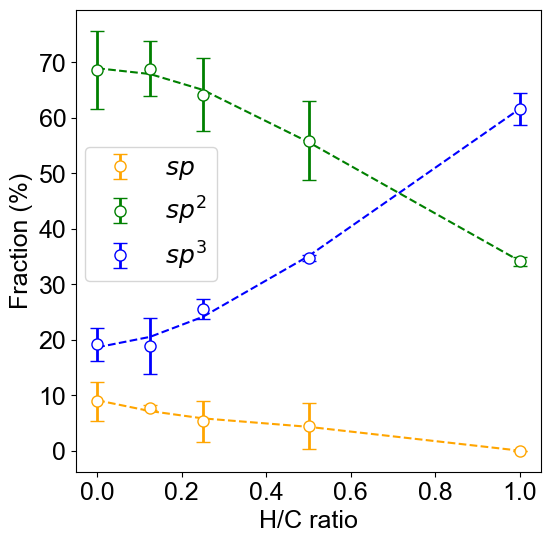

In [31]:
fs = 18
# Set global font and style settings
plt.rcParams.update({
    "font.family": "Arial",
  #  "font.sans-serif": "Helvetica",
})

def plot_hybridization_vs_hc_ratio(dataframe):
    
    # Exclude rows where Structure is Graphite or Diamond
    data_for_grouping = compiled_data[~compiled_data['Structure'].isin(['Graphite','Diamond'])]
    
    # Group by H/C Ratio and calculate mean and standard deviation for each hybridization type
    grouped = data_for_grouping.groupby("H/C Ratio").agg({
        "sp %": ["mean", "std"],
        "sp2 %": ["mean", "std"],
        "sp3 %": ["mean", "std"]
    }).reset_index() 
    
#     # Group by H/C Ratio and calculate mean and standard deviation for each hybridization type
#     grouped = dataframe.groupby("H/C Ratio").agg({
#         "sp %": ["mean", "std"],
#         "sp2 %": ["mean", "std"],
#         "sp3 %": ["mean", "std"]
#     }).reset_index()

    # Extract data for plotting
    hc_ratios = grouped["H/C Ratio"].values
    sp_mean = grouped[("sp %", "mean")].values
    sp_std = grouped[("sp %", "std")].values
    sp2_mean = grouped[("sp2 %", "mean")].values
    sp2_std = grouped[("sp2 %", "std")].values
    sp3_mean = grouped[("sp3 %", "mean")].values
    sp3_std = grouped[("sp3 %", "std")].values

    # Plotting
    plt.figure(figsize=(6, 6))

    # Plot for % sp hybridization
    plt.errorbar(hc_ratios, sp_mean, yerr=sp_std, label="$sp$", fmt="o", markersize=8, mfc="white", elinewidth=2, capsize=5, color = 'orange')
    plt.plot(hc_ratios, np.poly1d(np.polyfit(hc_ratios, sp_mean, 3))(hc_ratios), linestyle="--", color = 'orange')

    # Plot for % sp2 hybridization
    plt.errorbar(hc_ratios, sp2_mean, yerr=sp2_std, label="$sp^2$", fmt="o", markersize=8, mfc="white", elinewidth=2, capsize=5, color = 'green')
    plt.plot(hc_ratios, np.poly1d(np.polyfit(hc_ratios, sp2_mean, 3))(hc_ratios), linestyle="--", color = 'green')

    # Plot for % sp3 hybridization
    plt.errorbar(hc_ratios, sp3_mean, yerr=sp3_std, label="$sp^3$", fmt="o", markersize=8, mfc="white", elinewidth=2, capsize=5, color = 'blue')
    plt.plot(hc_ratios, np.poly1d(np.polyfit(hc_ratios, sp3_mean, 3))(hc_ratios), linestyle="--", color = 'blue')

    # Customizing plot
    plt.xlabel("H/C ratio", fontsize = fs)
    plt.ylabel("Fraction (%)", fontsize = fs)
#     plt.title("Hybridization vs H/C Ratio")

    plt.xticks(fontsize = fs)
    plt.yticks(fontsize = fs)
    
    plt.legend(fontsize = fs, bbox_to_anchor = (0.33,0.73)) # Gwan-Yeong's Setting: bbox_to_anchor = (1,0.75)


    # Save
    plt.savefig("1_hcRatio_vs_Hybrid.png", dpi=600) 
    plt.show()

# Call the function to plot
plot_hybridization_vs_hc_ratio(compiled_data)


# Refractive indices

In [ ]:

# fs = 16
# # Set global font and style settings
# plt.rcParams.update({
#     "font.family": "Arial",
#   #  "font.sans-serif": "Helvetica",
# })


# # Assuming compiled_data is already loaded as a DataFrame
# def plot_imaginary_refractive_index(compiled_data):
#     # Group by H/C Ratio
#     grouped_data = compiled_data.groupby('H/C Ratio')

#     # Define color palette
#     colors = sns.color_palette("copper", len(grouped_data))
#     # Plotting
#     plt.figure(figsize=(6, 6))
    
#     # Iterate through groups and assign colors
#     for (h_c_ratio, group), color in zip(grouped_data, colors):
#         all_wavelengths = [np.array(row['Refractive Indices']['Wavelength']) for _, row in group.iterrows()]
#         all_avg_k = [np.array(row['Refractive Indices']['Average_k']) for _, row in group.iterrows()]

#         # Ensure wavelengths are consistent by truncating to the minimum length
#         min_length = min(len(w) for w in all_wavelengths)
#         all_wavelengths = [w[:min_length] for w in all_wavelengths]
#         all_avg_k = [k[:min_length] for k in all_avg_k]

#         wavelengths = all_wavelengths[0]

#         # Calculate mean and std deviation for Average_k
#         all_avg_k = np.vstack(all_avg_k)
#         mean_k = np.mean(all_avg_k, axis=0)
#         std_k = np.std(all_avg_k, axis=0)
        
#         # Calculate mean and std deviation for %sp2 hybridization
#         mean_sp2_percent = group['sp2 %'].mean()
#         std_sp2_percent = group['sp2 %'].std()

#         # Plot mean curve with standard deviation shading
#         plt.plot(wavelengths, mean_k, label=f"$sp^2$: {mean_sp2_percent:.1f}±{std_sp2_percent:.1f}%", linewidth=2.5, color=color)
#         plt.fill_between(wavelengths, mean_k - std_k, mean_k + std_k, alpha=0.1, color=color)
        
#         # Find the closest value to 550 nm and add a data point
#         idx = np.abs(wavelengths - 550).argmin()
#         plt.scatter(wavelengths[idx], mean_k[idx], color=color, edgecolor='black', zorder=10, s=80, label=None)
        
        
#     for spine in plt.gca().spines.values():
#         spine.set_linewidth(1.5)
#     plt.tick_params(axis='both', which='major', length=6, width=1.5, labelsize=fs)  # Major ticks

#     plt.xlabel("Wavelength (nm)", fontsize = fs)
#     plt.ylabel("Imaginary refractive index, $k$", fontsize = fs)
#     plt.legend(loc="upper left", fontsize=fs-2, ncol=1)
#     plt.xlim(300, 900)
#     plt.xticks(fontsize = fs)
#     plt.yticks(fontsize = fs)
#     plt.ylim(0, 2.0)
#     plt.axvline(550, color = 'gray', linestyle = '--')
#     plt.tight_layout()
#     # Save
#   #  plt.savefig("2_k_vs_nm_hcRatio.png", dpi=600)
#     plt.show()

# # Call the function
# plot_imaginary_refractive_index(compiled_data)

In [ ]:
######## Updated Code Incorporating Graphite and Diamond

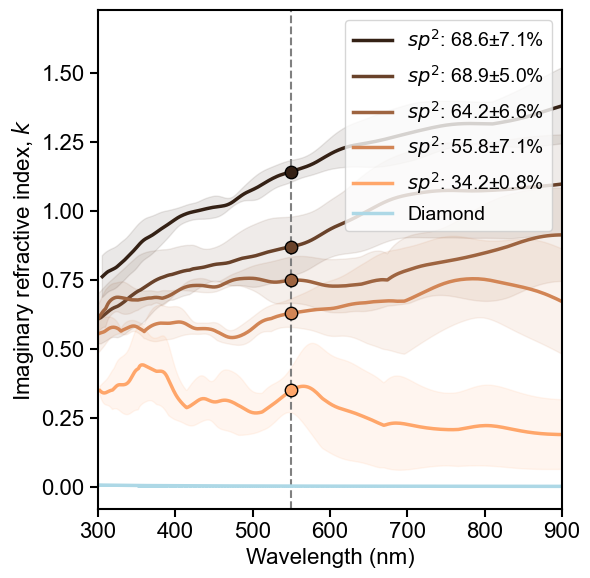

In [13]:

fs = 16
# Set global font and style settings
plt.rcParams.update({
    "font.family": "Arial",
  #  "font.sans-serif": "Helvetica",
})

from matplotlib.lines import Line2D

# Assuming compiled_data is already loaded as a DataFrame
def plot_imaginary_refractive_index(compiled_data):
    
    # Exclude rows where Structure is Graphite or Diamond
    data_for_grouping = compiled_data[~compiled_data['Structure'].isin(['Graphite','Diamond'])]
    
    # Now group by H/C Ratio on the filtered data
    grouped_data = data_for_grouping.groupby('H/C Ratio')    
    
#     # Group by H/C Ratio
#     grouped_data = compiled_data.groupby('H/C Ratio')

    # Define color palette
    colors = sns.color_palette("copper", len(grouped_data))
    # Plotting
    plt.figure(figsize=(6, 6))
    
    # Iterate through groups and assign colors
    for (h_c_ratio, group), color in zip(grouped_data, colors):
        all_wavelengths = [np.array(row['Refractive Indices']['Wavelength']) for _, row in group.iterrows()]
        all_avg_k = [np.array(row['Refractive Indices']['Average_k']) for _, row in group.iterrows()]

        # Ensure wavelengths are consistent by truncating to the minimum length
        min_length = min(len(w) for w in all_wavelengths)
        all_wavelengths = [w[:min_length] for w in all_wavelengths]
        all_avg_k = [k[:min_length] for k in all_avg_k]

        wavelengths = all_wavelengths[0]

        # Calculate mean and std deviation for Average_k
        all_avg_k = np.vstack(all_avg_k)
        mean_k = np.mean(all_avg_k, axis=0)
        std_k = np.std(all_avg_k, axis=0)
        
        # Calculate mean and std deviation for %sp2 hybridization
        mean_sp2_percent = group['sp2 %'].mean()
        std_sp2_percent = group['sp2 %'].std()

        # Plot mean curve with standard deviation shading
        plt.plot(wavelengths, mean_k, label=f"$sp^2$: {mean_sp2_percent:.1f}±{std_sp2_percent:.1f}%", linewidth=2.5, color=color)
        plt.fill_between(wavelengths, mean_k - std_k, mean_k + std_k, alpha=0.1, color=color)
        
        # Find the closest value to 550 nm and add a data point
        idx = np.abs(wavelengths - 550).argmin()
        plt.scatter(wavelengths[idx], mean_k[idx], color=color, edgecolor='black', zorder=10, s=80, label=None)
        
        
    for spine in plt.gca().spines.values():
        spine.set_linewidth(1.5)
    plt.tick_params(axis='both', which='major', length=6, width=1.5, labelsize=fs)  # Major ticks

    plt.xlabel("Wavelength (nm)", fontsize = fs)
    plt.ylabel("Imaginary refractive index, $k$", fontsize = fs)
    plt.legend(loc="upper left", fontsize=fs-2, ncol=1)
    plt.xlim(300, 900)
    plt.xticks(fontsize = fs)
    plt.yticks(fontsize = fs)
#     plt.ylim(0, 2.0)
    plt.axvline(550, color = 'gray', linestyle = '--')
    plt.tight_layout()
    
    # ...
    # [Code for Adding Graphite and Diamond curves]

    # --- Add this block AFTER your main for-loop and BEFORE plt.show() ---
    # Retrieve the rows for Graphite and Diamond
    graphite_row = compiled_data.loc[compiled_data['Structure'] == 'Graphite'].iloc[0]
    diamond_row  = compiled_data.loc[compiled_data['Structure'] == 'Diamond'].iloc[0]

    # Extract Wavelength and Average_k for each
    graphite_wavelengths = graphite_row['Refractive Indices']['Wavelength']
    graphite_k          = graphite_row['Refractive Indices']['Average_k']
    diamond_wavelengths = diamond_row['Refractive Indices']['Wavelength']
    diamond_k           = diamond_row['Refractive Indices']['Average_k']
    
#     # Plot Graphite: hexagon marker in gray
#     plt.plot(graphite_wavelengths, graphite_k, 
#              marker='h', markersize=1, color='gray', linewidth=2.5, 
#              label='Graphite')

    # Plot Diamond: D marker in light blue
    plt.plot(diamond_wavelengths, diamond_k, 
             marker='D', markersize=1, color='lightblue', linewidth=2.5, 
             label='Diamond')

    # Update legend so these new curves appear
    plt.legend(loc="upper right", fontsize=fs-2, ncol=1)
    
    # Save
    plt.savefig("2_k_vs_nm_hcRatio.png", dpi=600)
    plt.show()

# Call the function
plot_imaginary_refractive_index(compiled_data)

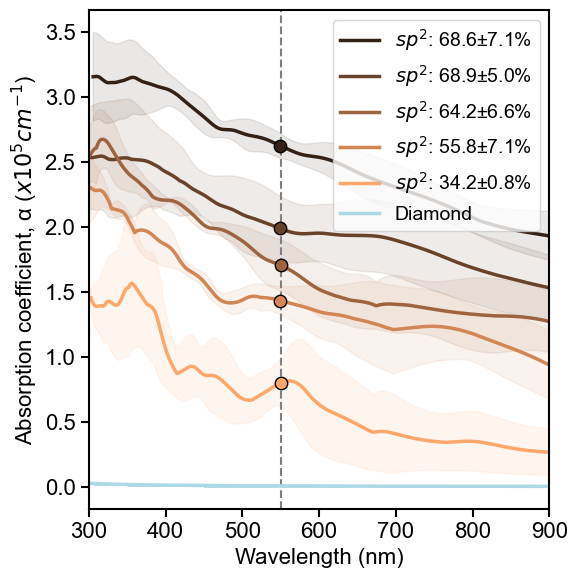

In [29]:

fs = 16
# Set global font and style settings
plt.rcParams.update({
    "font.family": "Arial",
  #  "font.sans-serif": "Helvetica",
})

from matplotlib.lines import Line2D

# Assuming compiled_data is already loaded as a DataFrame
def plot_imaginary_refractive_index(compiled_data):
    
    # Exclude rows where Structure is Graphite or Diamond
    data_for_grouping = compiled_data[~compiled_data['Structure'].isin(['Graphite','Diamond'])]
    
    # Now group by H/C Ratio on the filtered data
    grouped_data = data_for_grouping.groupby('H/C Ratio')    
    
#     # Group by H/C Ratio
#     grouped_data = compiled_data.groupby('H/C Ratio')

    # Define color palette
    colors = sns.color_palette("copper", len(grouped_data))
    # Plotting
    plt.figure(figsize=(6, 6))
    
    # Iterate through groups and assign colors
    for (h_c_ratio, group), color in zip(grouped_data, colors):
        all_wavelengths = [np.array(row['Refractive Indices']['Wavelength']) for _, row in group.iterrows()]
        all_avg_k = [np.array(row['Refractive Indices']['Average_abs'])/10**5 for _, row in group.iterrows()]

        # Ensure wavelengths are consistent by truncating to the minimum length
        min_length = min(len(w) for w in all_wavelengths)
        all_wavelengths = [w[:min_length] for w in all_wavelengths]
        all_avg_k = [k[:min_length] for k in all_avg_k]

        wavelengths = all_wavelengths[0]

        # Calculate mean and std deviation for Average_abs
        all_avg_k = np.vstack(all_avg_k)
        mean_k = np.mean(all_avg_k, axis=0)
        std_k = np.std(all_avg_k, axis=0)
        
        # Calculate mean and std deviation for %sp2 hybridization
        mean_sp2_percent = group['sp2 %'].mean()
        std_sp2_percent = group['sp2 %'].std()

        # Plot mean curve with standard deviation shading
        plt.plot(wavelengths, mean_k, label=f"$sp^2$: {mean_sp2_percent:.1f}±{std_sp2_percent:.1f}%", linewidth=2.5, color=color)
        plt.fill_between(wavelengths, (mean_k - std_k), (mean_k + std_k), alpha=0.1, color=color)
        
        # Find the closest value to 550 nm and add a data point
        idx = np.abs(wavelengths - 550).argmin()
        plt.scatter(wavelengths[idx], mean_k[idx], color=color, edgecolor='black', zorder=10, s=80, label=None)
        
        
    for spine in plt.gca().spines.values():
        spine.set_linewidth(1.5)
    plt.tick_params(axis='both', which='major', length=6, width=1.5, labelsize=fs)  # Major ticks

    plt.xlabel("Wavelength (nm)", fontsize = fs)
    plt.ylabel("Absorption coefficient, α ($x 10^5 cm^{-1}$)", fontsize = fs)
    plt.legend(loc="upper left", fontsize=fs-2, ncol=1)
    plt.xlim(300, 900)
    plt.xticks(fontsize = fs)
    plt.yticks(fontsize = fs)
#     plt.ylim(0, 2.0)
    plt.axvline(550, color = 'gray', linestyle = '--')
    plt.tight_layout()
    
    # ...
    # [Code for Adding Graphite and Diamond curves]

    # --- Add this block AFTER your main for-loop and BEFORE plt.show() ---
    # Retrieve the rows for Graphite and Diamond
    graphite_row = compiled_data.loc[compiled_data['Structure'] == 'Graphite'].iloc[0]
    diamond_row  = compiled_data.loc[compiled_data['Structure'] == 'Diamond'].iloc[0]

    # Extract Wavelength and Average_abs for each
    graphite_wavelengths = graphite_row['Refractive Indices']['Wavelength']
    graphite_k          = np.array(graphite_row['Refractive Indices']['Average_abs'])/10**5
    diamond_wavelengths = diamond_row['Refractive Indices']['Wavelength']
    diamond_k           = np.array(diamond_row['Refractive Indices']['Average_abs'])/10**5
    
#     # Plot Graphite: hexagon marker in gray
#     plt.plot(graphite_wavelengths, graphite_k, 
#              marker='h', markersize=1, color='gray', linewidth=2.5, 
#              label='Graphite')

    # Plot Diamond: D marker in light blue
    plt.plot(diamond_wavelengths, diamond_k, 
             marker='D', markersize=1, color='lightblue', linewidth=2.5, 
             label='Diamond')

    # Update legend so these new curves appear
    plt.legend(loc="upper right", fontsize=fs-2, ncol=1)
    
    # Save
    plt.savefig("3_Absorption_vs_nm_hcRatio.png", dpi=600)
    plt.show()

# Call the function
plot_imaginary_refractive_index(compiled_data)

In [ ]:
# !pip install seaborn

<>:69: SyntaxWarning: invalid escape sequence '\,'
<>:69: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_3058439/1025772459.py:69: SyntaxWarning: invalid escape sequence '\,'
  plt.ylabel("Imaginary refractive index, $k_{550\,\mathrm{nm}}$", fontsize=fs)


'Diamond_k550 nm: 0.002332531975'

'Graphite_k550 nm: 2.3959405'

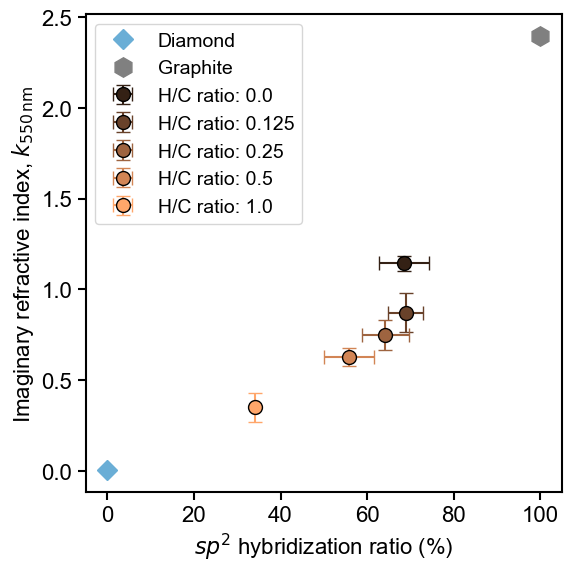

In [17]:
fs = 16  # Font size for consistency
plt.rcParams.update({"font.family": "Arial", "font.size": fs})  # Set font globally

def plot_k550nm_vs_sp2(compiled_data):

    # Exclude rows where Structure is Graphite or Diamond
    data_for_grouping = compiled_data[~compiled_data['Structure'].isin(['Graphite','Diamond'])]
    
    # Now group by H/C Ratio on the filtered data
    grouped_data = data_for_grouping.groupby('H/C Ratio')
    
#     grouped_data = compiled_data.groupby('H/C Ratio') # Commented to avoid including Graphite and Diamond in aC_Runs.

    mean_sp2_values = []
    std_sp2_values = []
    mean_k550_values = []
    std_k550_values = []

    for h_c_ratio, group in grouped_data:
        sp2_values = group['sp2 %']
        k550_values = []

        for _, row in group.iterrows():
            # Extract k at 550 nm
            wavelengths = np.array(row['Refractive Indices']['Wavelength'])
            k_values = np.array(row['Refractive Indices']['Average_k'])

            # Find the nearest wavelength to 550 nm
            idx_nearest = np.argmin(np.abs(wavelengths - 550))
            k550_values.append(k_values[idx_nearest])

        # Calculate means and standard deviations
        mean_sp2_values.append(np.mean(sp2_values))
        std_sp2_values.append(np.std(sp2_values))

        mean_k550_values.append(np.mean(k550_values))
        std_k550_values.append(np.std(k550_values))

    # Define color palette
    colors = sns.color_palette("copper", len(mean_sp2_values))

    # Plot the data
    plt.figure(figsize=(6, 6))
    for i, h_c_ratio in enumerate(grouped_data.groups.keys()):
        plt.errorbar(mean_sp2_values[i], mean_k550_values[i], 
                     xerr=std_sp2_values[i], yerr=std_k550_values[i], 
                     fmt='o', capsize=5, markersize=10, markeredgecolor='black', 
                     color=colors[i], label=f'H/C ratio: {h_c_ratio}')

    # Add specific data points for Diamond and Graphite
    Diamond_k550 = compiled_data.loc[compiled_data['Structure'] == 'Diamond', 'Refractive Indices'].iloc[0]['Average_k'][np.argmin(np.abs(np.array(compiled_data.loc[compiled_data['Structure'] == 'Diamond', 'Refractive Indices'].iloc[0]['Wavelength']) - 550))]
    plt.plot(0, Diamond_k550, 'D', color=sns.color_palette("Blues", 1)[0], markersize=10, label='Diamond')
    display(f"Diamond_k550 nm: {Diamond_k550}")
    
    Graphite_k550 = compiled_data.loc[compiled_data['Structure'] == 'Graphite', 'Refractive Indices'].iloc[0]['Average_k'][np.argmin(np.abs(np.array(compiled_data.loc[compiled_data['Structure'] == 'Graphite', 'Refractive Indices'].iloc[0]['Wavelength']) - 550))]
    plt.plot(100, Graphite_k550, 'h', color='grey', markersize=14, label='Graphite')
    display(f"Graphite_k550 nm: {Graphite_k550}")

    # Adjust box line width
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)

    # Adjust tick length and thickness
    ax.tick_params(axis='both', which='major', length=6, width=1.5, labelsize=fs)

    # Labels and legend
    plt.xlabel("$sp^2$ hybridization ratio (%)", fontsize=fs)
    plt.ylabel("Imaginary refractive index, $k_{550\,\mathrm{nm}}$", fontsize=fs)
    plt.legend(loc="best", fontsize=fs-2)
    plt.grid(False)
    plt.tight_layout()

    # Save the plot
    plt.savefig("4_k550_vs_sp2Hyrbid.png", dpi=600)
    plt.show()

# Call the function
plot_k550nm_vs_sp2(compiled_data)

In [ ]:
######### RDF Plotting:

# RDF

In [ ]:
from pymatgen.core import Structure
# from vasppy.rdf import RadialDistributionFunction
from typing import List, Optional, TypeVar, Type
from pymatgen.core import Element

In [ ]:
class RadialDistributionFunction(object):

    def __init__(self,
                 structures: List[Structure],
                 indices_i: List[int],
                 indices_j: Optional[List[int]] = None,
                 nbins: int = 500,
                 r_min: float = 0.0,
                 r_max: float = 10.0,
                 weights: Optional[List[float]] = None) -> None:
        if weights and len(weights) != len(structures):
            raise ValueError("List of structure weights must match the number of structures.")
        if not weights:
            weights = [1.0] * len(structures)

        self.self_reference = (not indices_j) or (indices_j == indices_i)
        if not indices_j:
            indices_j = indices_i

        self.indices_i = indices_i
        self.indices_j = indices_j
        self.nbins = nbins
        self.range = (r_min, r_max)
        self.intervals = np.linspace(r_min, r_max, nbins + 1)
        self.dr = (r_max - r_min) / nbins
        self.r = self.intervals[:-1] + self.dr / 2.0

        # Compute shell volumes
        self.ff = 4.0 / 3.0 * np.pi * (self.intervals[1:]**3 - self.intervals[:-1]**3)
        self.coordination_number = np.zeros(nbins)
        self.rdf = np.zeros(nbins, dtype=np.double)

        # Handle empty indices
        if not indices_i or not indices_j:
            self.rho_avg = 0.0
            return

        total_weight = sum(weights)
        rho_weighted_sum = 0.0

        for structure, weight in zip(structures, weights):
            dist = self.__dr_ij(structure)
            if len(dist) == 0:  # No distances
                continue
            hist = np.histogram(dist, bins=nbins, range=(r_min, r_max), density=False)[0]

            # Compute number density for this structure
            rho = float(len(self.indices_i)) / structure.lattice.volume
            rho_weighted_sum += rho * weight

            # Accumulate weighted histograms normalized by rho
            self.rdf += hist * weight / rho
            self.coordination_number += np.cumsum(hist)

        # Normalize to get g(r)
        self.rdf = self.rdf / self.ff / total_weight / float(len(indices_j))
        self.coordination_number = self.coordination_number / total_weight / float(len(indices_j))

        # Store the weighted average density
        self.rho_avg = rho_weighted_sum / total_weight

    def smeared_rdf(self, sigma: float = 0.1) -> np.ndarray:
        """
        Smooth the RDF with a Gaussian kernel.
        
        Args:
            sigma (float): Standard deviation for Gaussian kernel in Å.
        
        Returns:
            np.ndarray: Smoothed RDF.
        """
        if np.all(self.rdf == 0):  # Handle empty RDF
            return self.rdf
        sigma_n_bins = sigma / self.dr
        return gaussian_filter1d(self.rdf, sigma=sigma_n_bins)

    @classmethod
    def from_species_strings(cls: Type['RadialDistributionFunction'],
                             structures: List[Structure],
                             species_i: str,
                             species_j: Optional[str] = None,
                             **kwargs) -> 'RadialDistributionFunction':
        indices_i = [i for i, site in enumerate(structures[0]) if site.species_string == species_i]
        if species_j:
            indices_j = [j for j, site in enumerate(structures[0]) if site.species_string == species_j]
        else:
            indices_j = None
        return cls(structures=structures, indices_i=indices_i, indices_j=indices_j, **kwargs)

    def __dr_ij(self, structure: Structure) -> np.ndarray:
        if not self.indices_i or not self.indices_j:  # Handle empty indices
            return np.array([])
        lattice = structure.lattice
        i_frac_coords = structure.frac_coords[self.indices_i]
        j_frac_coords = structure.frac_coords[self.indices_j]
        dr_ij = lattice.get_all_distances(i_frac_coords, j_frac_coords)
        # Remove i=j distances if self_reference is True
        mask = np.ones(dr_ij.shape, dtype=bool)
        if self.self_reference:
            np.fill_diagonal(mask, 0)
        return dr_ij[mask].flatten()

    def Gr(self, sigma: Optional[float] = None) -> np.ndarray:
        """
        Compute G(r) from g(r).

        G(r) = g(r) * shell_volume * number_density

        Args:
            sigma (float, optional): If provided, applies Gaussian smoothing 
                                     to G(r) using this standard deviation in Å.

        Returns:
            np.ndarray: G(r) values (smoothed if sigma is provided).
        """
        if self.rho_avg == 0:  # Handle case with no valid density
            return np.zeros_like(self.rdf)
        G_r = self.rdf * self.ff * self.rho_avg
        if sigma is not None:
            sigma_n_bins = sigma / self.dr
            G_r = gaussian_filter1d(G_r, sigma=sigma_n_bins)
        return G_r


In [ ]:
# path_1 = r'E:\Postdoc\amorphous_C\data\Relaxed_Optics_Runs_19Dec2024\Relaxed_Optics_Runs\aC_Run1\7_IP_LOPTICS'
path_1 = r'E:\Postdoc\amorphous_C\data\Relaxed_Optics_Runs_19Dec2024\Relaxed_Optics_Runs\aC_120H_Run1\6_Standard_DFT'
struc = Structure.from_file(path_1 + '/' + 'POSCAR')
struc

In [ ]:
# Function to filter atoms by hybridization
def filter_atoms_by_hybridization(struc,  hybridization, cutoff = 1.85):
    # Get neighbors within the cutoff radius
    all_neighbors = struc.get_all_neighbors(cutoff, include_index=True)

    # Identify carbon atoms and filter by hybridization
    carbon_indices = [i for i, site in enumerate(struc) if site.species_string == 'C']
    target_indices = []

    for i in carbon_indices:
        # Get neighbors for the current carbon atom
        neighbors = all_neighbors[i]
        coordination_number = len(neighbors)

        # Determine hybridization based on coordination number
        if hybridization == 'sp' and coordination_number == 2:
            target_indices.append(i)
        elif hybridization == 'sp2' and coordination_number == 3:
            target_indices.append(i)
        elif hybridization == 'sp3' and coordination_number == 4:
            target_indices.append(i)

    return target_indices


In [ ]:
struc[0].specie == Element('C')

In [ ]:
indices_all = [i for i in range(len(struc)) if struc[i].specie == Element('C')]
indices_sp = filter_atoms_by_hybridization(struc, hybridization='sp', cutoff=1.85)
indices_sp2 = filter_atoms_by_hybridization(struc, hybridization='sp2', cutoff=1.85)
indices_sp3 = filter_atoms_by_hybridization(struc, hybridization='sp3', cutoff=1.85)

In [ ]:
print(indices_sp," ",indices_sp2," ",indices_sp3)
print(len(indices_all)," ",len(indices_sp)," ",len(indices_sp2)," ",len(indices_sp3))

In [ ]:
rdf_0 = RadialDistributionFunction(structures = [struc], indices_i = indices_all)
plt.plot(rdf_0.r, rdf_0.rdf)
plt.plot(rdf_0.r, rdf_0.smeared_rdf())
plt.plot(rdf_0.r, rdf_0.smeared_rdf(sigma = 0.05))


plt.show()

In [ ]:
rdf_0 = RadialDistributionFunction(structures = [struc], indices_i = indices_all)
plt.plot(rdf_0.r, rdf_0.Gr())
plt.plot(rdf_0.r, rdf_0.Gr(sigma = 0.05))


plt.show()

In [ ]:
rdf_0 = RadialDistributionFunction(structures = [struc], indices_i = indices_all)
rdf_1 = RadialDistributionFunction(structures = [struc], indices_i = indices_sp)
rdf_2 = RadialDistributionFunction(structures = [struc], indices_i = indices_sp2)
rdf_3 = RadialDistributionFunction(structures = [struc], indices_i = indices_sp3)

plt.plot(rdf_0.r, rdf_0.smeared_rdf(sigma = 0.1), label = 'total')
plt.plot(rdf_1.r, rdf_1.smeared_rdf(sigma = 0.1), label = 'sp')
plt.plot(rdf_2.r, rdf_2.smeared_rdf(sigma = 0.1), label = 'sp2')
plt.plot(rdf_3.r, rdf_3.smeared_rdf(sigma = 0.1), label = 'sp3')
plt.legend()

plt.show()

In [ ]:
rdf_0 = RadialDistributionFunction(structures = [struc], indices_i = indices_all)
rdf_1 = RadialDistributionFunction(structures = [struc], indices_i = indices_sp)
rdf_2 = RadialDistributionFunction(structures = [struc], indices_i = indices_sp2)
rdf_3 = RadialDistributionFunction(structures = [struc], indices_i = indices_sp3)

plt.plot(rdf_0.r, rdf_0.Gr(sigma = 0.1), label = 'total')
plt.plot(rdf_1.r, rdf_1.Gr(sigma = 0.1), label = 'sp')
plt.plot(rdf_2.r, rdf_2.Gr(sigma = 0.1), label = 'sp2')
plt.plot(rdf_3.r, rdf_3.Gr(sigma = 0.1), label = 'sp3')
plt.legend()
plt.show()

In [ ]:
# path_1 = r"E:\Postdoc\amorphous_C\data\Relaxed_Optics_Runs_19Dec2024\Relaxed_Optics_Runs\graphite"
path_1 = "/scratch/09900/joshinkumar/Relaxed_Carbon_DFT_Runs/Relaxed_Optics_Runs/aC_Run1/7_IP_LOPTICS"
path_2 = "/scratch/09900/joshinkumar/Relaxed_Carbon_DFT_Runs/Relaxed_Optics_Runs/aC_15H_Run1/6_Standard_DFT"
path_3 = "/scratch/09900/joshinkumar/Relaxed_Carbon_DFT_Runs/Relaxed_Optics_Runs/aC_30H_Run1/6_Standard_DFT"
path_4 = "/scratch/09900/joshinkumar/Relaxed_Carbon_DFT_Runs/Relaxed_Optics_Runs/aC_60H_Run1/6_Standard_DFT"
path_5 = "/scratch/09900/joshinkumar/Relaxed_Carbon_DFT_Runs/Relaxed_Optics_Runs/aC_120H_Run1/6_Standard_DFT"


path_list = [path_1, path_2, path_3, path_4, path_5] # , path_6]

In [ ]:
# Create subplots
fig, axes = plt.subplots(5, 1, figsize=(6, 10), constrained_layout=False)

fs = 14

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.0)  # Remove vertical spacing between subplots

labels = [0.0, 0.125, 0.25, 0.5, 1.0]

# Loop through each structure
for idx, path in enumerate(path_list):
    # Load structure
    struc = Structure.from_file(path + '/' + 'POSCAR')

    # Find indices for all carbons and specific hybridizations
    indices_all = [i for i in range(len(struc)) if struc[i].specie == Element('C')]
    indices_sp = filter_atoms_by_hybridization(struc, hybridization='sp', cutoff=1.85)
    indices_sp2 = filter_atoms_by_hybridization(struc, hybridization='sp2', cutoff=1.85)
    indices_sp3 = filter_atoms_by_hybridization(struc, hybridization='sp3', cutoff=1.85)
    print(len(indices_all)," ",len(indices_sp)," ",len(indices_sp2)," ",len(indices_sp3))

    # Calculate RDF for all carbons and specific hybridizations
    rdf_all = RadialDistributionFunction(structures=[struc], indices_i=indices_all)
    rdf_sp = RadialDistributionFunction(structures=[struc], indices_i=indices_sp)
    rdf_sp2 = RadialDistributionFunction(structures=[struc], indices_i=indices_sp2)
    rdf_sp3 = RadialDistributionFunction(structures=[struc], indices_i=indices_sp3)

    # Plot RDFs
    ax = axes[idx]

    # Plot sp hybridization
    if indices_sp:
        ax.plot(rdf_sp.r, rdf_sp.Gr(0.1), color='orange', label='$sp$', linewidth=2)
    else:
        ax.plot(rdf_all.r, np.zeros_like(rdf_all.r), color='orange', label='$sp$', linewidth=2)

    # Plot sp² hybridization
    if indices_sp2:
        ax.plot(rdf_sp2.r, rdf_sp2.Gr(0.1), color='green', label='$sp^2$', linewidth=2)
    else:
        ax.plot(rdf_all.r, np.zeros_like(rdf_all.r), color='green', label='$sp^2$', linewidth=2)

    # Plot sp³ hybridization
    if indices_sp3:
        ax.plot(rdf_sp3.r, rdf_sp3.Gr(0.1), color='blue', label='$sp^3$', linewidth=2)
    else:
        ax.plot(rdf_all.r, np.zeros_like(rdf_all.r), color='blue', label='$sp^3$', linewidth=2)

    ax.plot(rdf_all.r, rdf_all.Gr(0.1), color = 'black', label='Total', linewidth=2)
    
    # Customize plot
    if idx < len(path_list) - 1:
        ax.set_xticklabels([])  # Hide x-axis tick labels for all but the last plot
        ax.set_xlabel('')       # Hide x-axis label for all but the last plot
    else:
        ax.set_xlabel('Distance (Å)', fontsize=fs)  # Show x-axis label for the bottom plot
    ax.set_ylabel('G(r)', fontsize=fs)
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 0.7])
    ax.text(0.15,0.55,"H/C ratio = %s" % labels[idx], fontsize = fs)

axes[3].legend(bbox_to_anchor = (1.35,2.5), fontsize=fs)  # Add legend to the bottom plot

# Show the plots
plt.show()

# Density of states

In [ ]:

from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.core.composition import Composition
from pymatgen.electronic_structure.dos import OrbitalType
from pymatgen.electronic_structure.core import Spin


In [ ]:
path_1 = r"E:\Postdoc\amorphous_C\data\Relaxed_Optics_Runs_19Dec2024\Relaxed_Optics_Runs\aC_Run1\DOS\v2"
path_2 = r"E:\Postdoc\amorphous_C\data\Relaxed_Optics_Runs_19Dec2024\Relaxed_Optics_Runs\aC_15H_Run1\DOS\v2"
path_3 = r"E:\Postdoc\amorphous_C\data\Relaxed_Optics_Runs_19Dec2024\Relaxed_Optics_Runs\aC_30H_Run1\DOS\v2"
path_4 = r"E:\Postdoc\amorphous_C\data\Relaxed_Optics_Runs_19Dec2024\Relaxed_Optics_Runs\aC_60H_Run1\DOS\v2"
path_5 = r"E:\Postdoc\amorphous_C\data\Relaxed_Optics_Runs_19Dec2024\Relaxed_Optics_Runs\aC_120H_Run1\DOS\v2"

path_list = [path_1, path_2, path_3, path_4, path_5] # , path_6]

In [ ]:
def get_pdos(cdos,struc,idx_list): # idx_list= [12,13,14,15,16,17,18,19,20,21,22,23] 
    
    energies = cdos.get_site_dos(struc[-1]).as_dict()['energies']
    e_fermi = cdos.as_dict()['efermi']
    energies = [e - e_fermi for e in energies]
    
    a_tmp = np.zeros(8000)
    for idx in idx_list:
        a_tmp = a_tmp + cdos.get_site_dos(struc[idx]).as_dict()['densities']['1']
  
    str_tmp = a_tmp / len(idx_list)
    return (energies, str_tmp)

In [ ]:
def find_indices_for_species(structure, species):
    """
    Find the indices of specific species in a given structure.

    Parameters:
    - structure: pymatgen Structure object
    - species: List of species to find (e.g., ['C', 'H'])

    Returns:
    - indices: List of indices of the specified species in the structure
    """
    indices = []
    for i, site in enumerate(structure):
        if site.species_string in species:
            indices.append(i)
    return indices

In [ ]:
# Load Vasprun and structure
vrun_1 = Vasprun(path_1 + '/' + 'vasprun.xml')
cdos_1 = vrun_1.complete_dos
struc_1 = cdos_1.structure

In [ ]:
# Initialize dictionaries to store data
cdos_dict = {}
struc_dict = {}
pdos_dict = {}
energies_dict = {}
labels = ['Total', 'C', 'H']  # To differentiate total, Carbon, and Hydrogen PDOS

# Loop through paths and process PDOS
for idx, path in enumerate(path_list, start=1):
    # Load Vasprun and structure
    vrun = Vasprun(path + '/' + 'vasprun.xml')
    cdos = vrun.complete_dos
    struc = cdos.structure

    # Store CDOS and structure in dictionaries
    cdos_dict[f"cdos_{idx}"] = cdos
    struc_dict[f"struc_{idx}"] = struc

    # Find indices for all species
    idx_list_all = find_indices_for_species(struc, ['C', 'H'])
    idx_list_C = find_indices_for_species(struc, ['C'])
    idx_list_H = find_indices_for_species(struc, ['H'])
    print(len(idx_list_all)," ",len(idx_list_C)," ",len(idx_list_H))

    # Get the PDOS and energies
    energies, pdos_all = get_pdos(cdos, struc, idx_list_all)
    _, pdos_C = get_pdos(cdos, struc, idx_list_C)
    _, pdos_H = get_pdos(cdos, struc, idx_list_H)

    # Store energies and PDOS in dictionaries
    energies_dict[f"energies_{idx}"] = energies
    pdos_dict[f"pdos_{idx}"] = {
        "Total": pdos_all,
        "C": pdos_C,
        "H": pdos_H,
    }

In [ ]:
# Create subplots for DOS
fig, axes = plt.subplots(len(path_list), 1, figsize=(6, 10), constrained_layout=False)

fs = 16  # Font size for consistency
plt.subplots_adjust(hspace=0.0)  # Remove vertical spacing between subplots

# Labels for H/C ratios
labels = [0.0, 0.125, 0.25, 0.5, 1.0]

# Loop through paths and plot
for idx, path in enumerate(path_list, start=1):
    ax = axes[idx - 1]  # Select subplot

    # Access energies and PDOS from the dictionaries
    energies = energies_dict[f"energies_{idx}"]
    pdos_all = pdos_dict[f"pdos_{idx}"]["Total"]
    pdos_C = pdos_dict[f"pdos_{idx}"]["C"]
    pdos_H = pdos_dict[f"pdos_{idx}"]["H"]

    # Plot total PDOS
    ax.plot(energies, pdos_all, color='black', label='Total', linewidth=2)

    # Plot Carbon contribution
    ax.plot(energies, pdos_C, color='blue', label='C', linewidth=2)

    # Plot Hydrogen contribution
    ax.plot(energies, pdos_H, color='gray', label='H', linewidth=2)

    # Customize plot
    if idx < len(path_list):
        ax.set_xticklabels([])  # Hide x-axis tick labels for all but the last plot
        ax.set_xlabel('')       # Hide x-axis label for all but the last plot
    else:
        ax.set_xlabel('$E$ - $E_F$ (eV)', fontsize=fs)  # Show x-axis label for the bottom plot
    
    ax.set_xlim([-0.5, 0.5])  # Adjust energy range as needed
    ax.set_ylim([0, 0.35])  # Dynamically adjust y-limits
#    ax.text(-19, 0.3,f"H/C ratio = {labels[idx - 1]}", fontsize=fs)

axes[2].set_ylabel('DOS (states/eV)', fontsize=fs)
# Add legend to the middle subplot
axes[len(path_list) // 2].legend(bbox_to_anchor=(1.35, 2.5), fontsize=fs)

# Show the plot
plt.show()